In [1]:
%load_ext memory_profiler

###################################################################################

######################
#import useful modules
######################
import sys

sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from matplotlib.offsetbox import AnchoredText

from Modules import *


In [2]:
###################################################################################
# Load simul [zoom over the eurec4a region]
###################################################################################



simulname = 'gigatl3_1h_tides'; time = 10080
#simulname = 'gigatl3_1h_hourly_eurec4a'; time = 35520
%memit simul = load(simul = simulname, time = time, light=False, output=False)


simulname = 'gigatl3_1h_hourly_eurec4a'; time = 35520
%memit simul_zoom = load(simul = simulname, time = time, light=False, output=False)


#simulname = 'gigatl1_1h_tides_region_eurec4a'; time = 43512
#%memit simul_zoom2 = load(simul = simulname, time = time, light=False, output=True)


peak memory: 859.25 MiB, increment: 741.11 MiB
peak memory: 891.22 MiB, increment: 31.91 MiB


In [8]:

simulname = 'eurec1'; time = 0
%memit simul_eurec1 = load(simul = simulname, time = time, light=False, output=False)



peak memory: 2420.15 MiB, increment: 94.19 MiB


In [4]:
# Define horizontal coordinates (deg, km, or grid points)
##############

coord = 'km'

if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'

##############


In [9]:
depth = 0 # at the surface

#################################################

# Compute relative vorticity (and normalize by f)
%memit vrt = var('vrt',simul,depths=[depth]).data/tools.rho2psi(simul.f)*tools.rho2psi(simul.mask)

'''############

depth1 = -300 #

#################################################

# Compute relative vorticity (and normalize by f)
%memit vrt_depth = var('vrt',simul,depths=[depth]).data/tools.rho2psi(simul.f)*tools.rho2psi(simul.mask)'''

computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
computing vrt
comput

"############\n\ndepth1 = -300 #\n\n#################################################\n\n# Compute relative vorticity (and normalize by f)\n%memit vrt_depth = var('vrt',simul,depths=[depth]).data/tools.rho2psi(simul.f)*tools.rho2psi(simul.mask)"

In [6]:
'''#################################################
# Plot horizontal sections of salinity and vorticity
#################################################

fig = plt.figure(figsize=(18.0,8.0)) 

#################################################

ax2 = fig.add_subplot(121,facecolor='Gainsboro')

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.,shading='auto');
plt.colorbar()

CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta/f$', fontsize=20)

if coord=='deg':
    plt.axis([-63,-51,5,17])


### add depth on plot
if depth==0:    
    at = AnchoredText('surface',loc=3, prop=dict(size=18), frameon=True, )
else:
    at = AnchoredText(r'$z =$'+format(depth)+ ' m',loc=3, prop=dict(size=18), frameon=True, )

at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

### 

ax2 = fig.add_subplot(122,facecolor='Gainsboro')

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt_depth),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-.5,vmax=.5,shading='auto');
plt.colorbar()

CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta/f$', fontsize=20)

if coord=='deg':
    plt.axis([-63,-51,5,17])

### add depth on plot
if depth==0:    
    at = AnchoredText('surface',loc=3, prop=dict(size=18), frameon=True, )
else:
    at = AnchoredText(r'$z =$'+format(depth1)+ ' m',loc=3, prop=dict(size=18), frameon=True, )

at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)


### save the figure
plt.savefig('eurec4a_horiz_section_' + '{0:04}'.format(-depth1) +  '.png', bbox_inches='tight', transparent='true', dpi=200)'''

'#################################################\n# Plot horizontal sections of salinity and vorticity\n#################################################\n\nfig = plt.figure(figsize=(18.0,8.0)) \n\n#################################################\n\nax2 = fig.add_subplot(121,facecolor=\'Gainsboro\')\n\nplt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt),               cmap = plot.ncview_colormap(\'blu_red\'),vmin=-1.,vmax=1.,shading=\'auto\');\nplt.colorbar()\n\nCS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = (\'k\',), linewidths = (.1,)); \n#plt.clabel(CS1, fmt = \'%2.0f\', colors = \'k\', fontsize=6)  ; \n\nplt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)\nplt.title(r\'$\\zeta/f$\', fontsize=20)\n\nif coord==\'deg\':\n    plt.axis([-63,-51,5,17])\n\n\n### add depth on plot\nif depth==0:    \n    at = AnchoredText(\'surface\',loc=3, prop=dict(size=18), frameon=True, )\nelse:\n    at = AnchoredText(r\'$z =$\'+format(depth)+ \'

# Example with cartopy

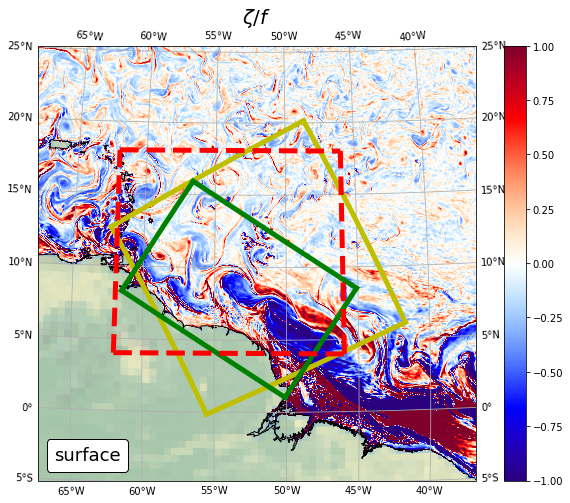

In [7]:
def plot_domain(simul,ax,color = 'DimGray', label=' ' ):
    domaincolor = color
    domainalpha = 1.
    plot, = ax.plot(simul.x[-1,:], simul.y[-1,:], color=domaincolor,alpha=domainalpha,\
            linewidth=5, transform=ccrs.PlateCarree(), label=label)
    ax.plot(simul.x[:,0], simul.y[:,0], color=domaincolor,alpha=domainalpha,\
            linewidth=5, transform=ccrs.PlateCarree())
    ax.plot(simul.x[0,:], simul.y[0,:], color=domaincolor,alpha=domainalpha,\
            linewidth=5, transform=ccrs.PlateCarree())
    ax.plot(simul.x[:,-1], simul.y[:,-1], color=domaincolor,alpha=domainalpha,\
            linewidth=5, transform=ccrs.PlateCarree())
    return plot
    
###################
    
import cartopy.crs as ccrs

###################
# begin : map inset 


central_lon, central_lat = simul_zoom.x.mean(), simul_zoom.y.mean()
projection = ccrs.Orthographic(central_lon, central_lat)


#################################################
# Plot horizontal sections of salinity and vorticity
#################################################

fig = plt.figure(figsize=(10.0,8.0)) 

ax1 = fig.add_subplot(111,facecolor='Gainsboro',projection=projection)

#################################################


extent = [np.min(simul_zoom.x)-5,np.max(simul_zoom.x)+5,np.min(simul_zoom.y)-5,np.max(simul_zoom.y)+5]
ax1.set_extent(extent); 
ax1.coastlines(resolution='10m')
ax1.stock_img(); 

gl = ax1.gridlines(draw_labels=True)


#################
vrt[tools.rho2psi(simul.mask)==0] = np.nan
    
plt.pcolormesh(simul.x,simul.y,ma.masked_invalid(vrt),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.,shading='auto',transform=ccrs.PlateCarree());
plt.colorbar()

CS1 = plt.contour(simul.x,simul.y,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta/f$', fontsize=20)


### add depth on plot
if depth==0:    
    at = AnchoredText('surface',loc=3, prop=dict(size=18), frameon=True, )
else:
    at = AnchoredText(r'$z =$'+format(depth)+ ' m',loc=3, prop=dict(size=18), frameon=True, )

at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)


##################
# plot subdomains
##################
plot1 = plot_domain(simul_zoom,ax1,color='y',label='GIGATL3 (zoom)')
plot2 = plot_domain(simul_eurec1,ax1,color='g',label='EUREC1')
#plot3 = plot_domain(simul_zoom2,ax1,color='r',label='EUREC1')

ax1.plot([-62, -46], [4 ,4], '--', color='r',\
            linewidth=5, transform=ccrs.PlateCarree())
ax1.plot([-62, -46], [18 ,18], '--', color='r',\
            linewidth=5, transform=ccrs.PlateCarree())
ax1.plot([-62, -62], [4 ,18], '--', color='r',\
            linewidth=5, transform=ccrs.PlateCarree())
ax1.plot([-46, -46], [4 ,18], '--', color='r',\
            linewidth=5, transform=ccrs.PlateCarree())

#plt.legend([plot1, plot2],['GIGATL3 (zoom)','EUREC1'])

### save the figure
plt.savefig('test_cartopy.png', bbox_inches='tight', transparent='true', dpi=200)




